In [35]:
import configparser
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dir = '/remote/ceph/group/ilc/claws/phase1/RAW/connecticut'
subfolder = 'data_root'
out = '/home/iwsatlas1/mgabriel/workspace/claws_phaseI/claws_calibration/PythonScripts/list_of_pvs.csv'

In [4]:
entries = ['Properties.EventNr', 'Properties.UnixTime', 'SuperKEKBData.SuperKEKBStatus', 'SuperKEKBData.LERSTatus', 'SuperKEKBData.HERStatus', 'SuperKEKBData.LERInj', 'SuperKEKBData.HERInj', 'SuperKEKBData.LERBg', 'SuperKEKBData.HERBg', 'SuperKEKBData.LERCurrent', 'SuperKEKBData.HERCurrent']

In [26]:
df = pd.DataFrame(columns=entries)
# ini_files = []
# ini_paths = []
for root, dirnames, filenames in os.walk(dir):


    for file in sorted(filenames):
        if file.endswith('.ini') and subfolder in root:
            if '2016-05-' in root or '2016-06-' in root:
                
            #print(os.path.join(root,file))
#                 ini_files.append(os.path.join(root,file))
#                 ini_paths.append(root)
                config = configparser.ConfigParser(strict=False)
                config.optionxform = str
                config.read(os.path.join(root,file))
                
                dict = {}
                for entry in entries:    
                    try:
                        sec = entry.split('.')[0]
                        name = entry.split('.')[1]
                        val = config.get(sec,name)
    #                     try: 
    #                         dict[entry] = float(val)
    #                     except ValueError:
    #                         dict[entry] = val

                        dict[entry] = val
                    except (KeyError, configparser.NoOptionError, configparser.NoSectionError):
                        pass
    #                     print('KEYERROR: ' + entry)
    #                     print(config.items('Properties'))
    #                     print(config.items('SuperKEKBData'))

                df = df.append(dict,ignore_index=True)     

               # print(config.items('Properties'))
                #val = config[entry.split('.')[1]]
                #val = 1
                #print(str(name) + ': ' + str(val))
                #df = df.append({entry: }, ignore_index=True)
            
                
df.to_csv(out)

In [34]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Properties.EventNr
['400407001' '400407002' '400407003' ... '401214299' '401214300'
 '401214301']
Properties.UnixTime
['1463246392.5263095' '1463246400.3447566' '1463246409.7352934' ...
 '1465377305.1248393' '1465377307.6859856' '1465377309.4470863']
SuperKEKBData.SuperKEKBStatus
['Vacuum Scrubbing' 'Tuning' 'Beast Study' 'Abort Study' 'Feedback Tuning'
 'Feedback tuning' 'X-ray monitor tuning' '' 'Collimator Study'
 'Injection background  Study' 'Optics study' 'Optics Correction' 'Limit'
 'Quad BPM' 'Study' 'Beam size measurement']
SuperKEKBData.LERSTatus
['Vacuum Scrubbing' 'Optics measurements' 'Beast Study' 'Feedback tuning'
 '' 'Collimator Study' 'Injection background  Study' 'Optics study'
 'Optics Correction' 'Limit' 'Quad BPM' 'Beast study' 'Size monitor study'
 'Off Momentum Optics Measurement' 'Dithering System Study'
 'Life Time Measurement' 'Beam size measurement' 'Optics Measurement'
 'Blowup Study']
SuperKEKBData.HERStatus
['Vacuum Scrubbing' 'XRM Study & Tuning' 'Injecti

# Read in processed csv file

In [5]:
df = pd.read_csv(out)

In [30]:
df.columns

Index(['Unnamed: 0', 'Properties.EventNr', 'Properties.UnixTime',
       'SuperKEKBData.SuperKEKBStatus', 'SuperKEKBData.LERSTatus',
       'SuperKEKBData.HERStatus', 'SuperKEKBData.LERInj',
       'SuperKEKBData.HERInj', 'SuperKEKBData.LERBg', 'SuperKEKBData.HERBg',
       'SuperKEKBData.LERCurrent', 'SuperKEKBData.HERCurrent', 'Date'],
      dtype='object')

In [7]:
df['Properties.UnixTime'].describe()

count    5.856900e+04
mean     1.464709e+09
std      1.060083e+06
min      1.463246e+09
25%      1.464069e+09
50%      1.464196e+09
75%      1.465382e+09
max      1.467056e+09
Name: Properties.UnixTime, dtype: float64

In [9]:
df['Date'] = pd.to_datetime(df['Properties.UnixTime'],unit='s')

In [11]:
df['Date'].describe()

count                             58569
unique                            58569
top       2016-05-31 04:21:56.804641247
freq                                  1
first     2016-05-14 17:17:06.177794933
last      2016-06-27 19:31:06.702665329
Name: Date, dtype: object

In [14]:
df.Date = df.Date.dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')

In [17]:
df['Date'].describe()

count                                   58569
unique                                  58569
top       2016-05-31 13:21:56.804641247+09:00
freq                                        1
Name: Date, dtype: object

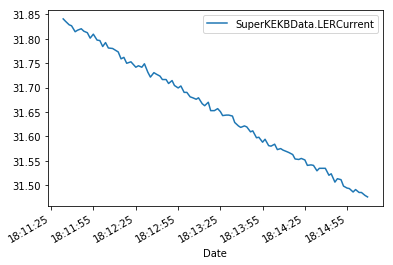

In [31]:
df[['Date','SuperKEKBData.LERCurrent']][-100:].plot(x='Date', y='SuperKEKBData.LERCurrent')

<Figure size 1152x288 with 0 Axes>

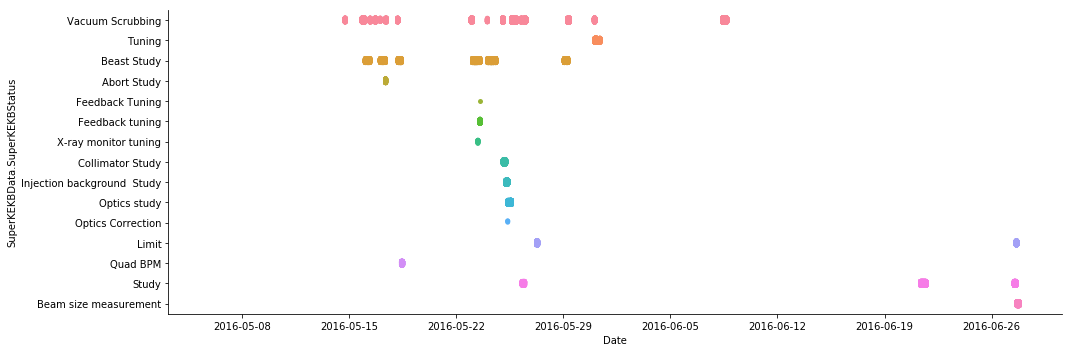

In [40]:
plt.figure(figsize=(16,4))
sns.catplot(x='Date', y='SuperKEKBData.SuperKEKBStatus', data=df, aspect=3)

<Figure size 1152x288 with 0 Axes>

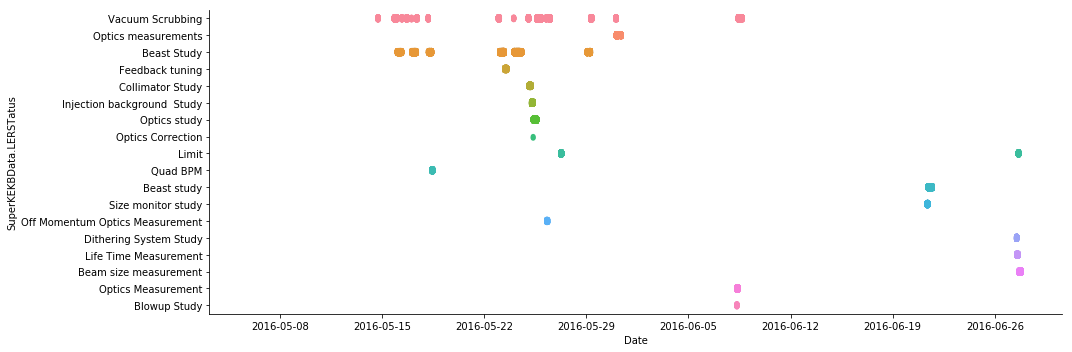

In [41]:
plt.figure(figsize=(16,4))
sns.catplot(x='Date', y='SuperKEKBData.LERSTatus', data=df, aspect=3)

<Figure size 1152x288 with 0 Axes>

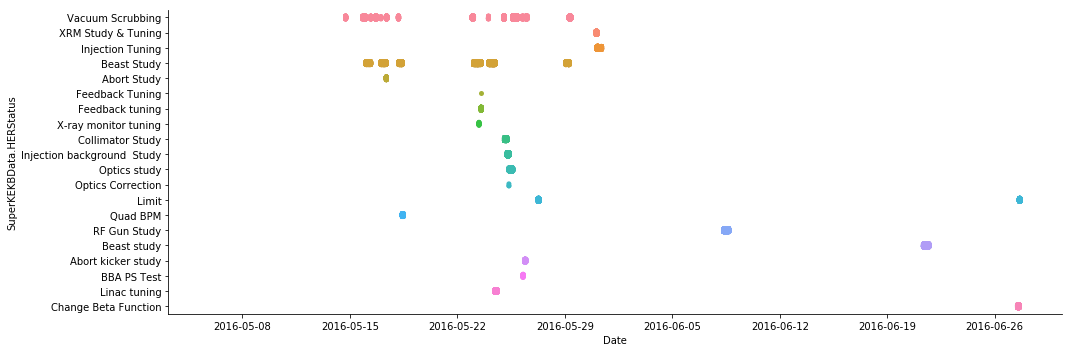

In [43]:
plt.figure(figsize=(16,4))
sns.catplot(x='Date', y='SuperKEKBData.HERStatus', data=df, aspect=3)

In [8]:
print("Min timestamp:")
print(pd.to_datetime(df['Properties.UnixTime'].min(),unit='s'))
print("Max timestamp:")
print(pd.to_datetime(df['Properties.UnixTime'].max(),unit='s'))

Min timestamp:
2016-05-14 17:17:06.177794933
Max timestamp:
2016-06-27 19:31:06.702665329


In [6]:
pd.to_datetime(df['Properties.UnixTime'],unit='s')

88       2017-03-03 14:03:41.015037537
89       2017-03-03 14:03:56.568927765
90       2017-03-03 14:04:11.656790495
91       2017-03-03 14:04:26.435636044
92       2017-03-03 14:04:41.574501514
93       2017-03-03 14:04:56.615362406
94       2017-03-03 14:05:11.309202433
95       2017-03-03 14:05:26.016043663
96       2017-03-03 14:05:40.738885641
97       2017-03-03 14:05:55.231714249
98       2017-03-03 14:06:09.769546032
99       2017-03-03 14:06:25.611451864
100      2017-03-03 14:06:41.571365356
101      2017-03-03 14:06:57.655284882
102      2017-03-03 14:07:13.404185772
103      2017-03-03 14:07:29.445103407
104      2017-03-03 14:07:45.764036655
105      2017-03-03 14:08:01.693947554
106      2017-03-03 14:08:17.421847343
107      2017-03-03 14:08:33.571771383
108      2017-03-03 14:08:49.659691095
109      2017-03-03 14:09:05.698608875
110      2017-03-03 14:09:21.733525753
111      2017-03-03 14:09:37.672437429
112      2017-03-03 14:09:53.565346241
113      2017-03-03 14:10

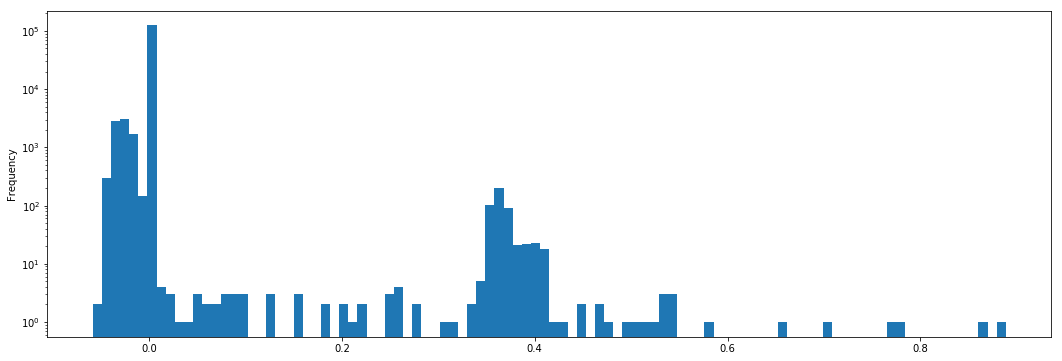

In [26]:
df[df['SuperKEKBData.SuperKEKBStatus']=='Beast Study']['SuperKEKBData.HERCurrent']

In [31]:
lim = 1
df[(df['SuperKEKBData.HERCurrent']<lim)&(df['SuperKEKBData.LERCurrent']<lim)&(df['SuperKEKBData.LERInj']==0)&(df['SuperKEKBData.HERInj']==0)].shape

(124308, 12)

In [32]:
df[(df['SuperKEKBData.HERCurrent']<lim)&(df['SuperKEKBData.LERCurrent']<lim)].shape

(126686, 12)